In [1]:
import numpy as np
#matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time

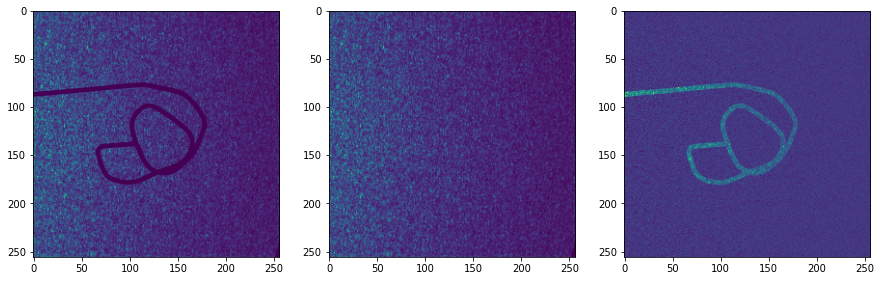

In [2]:
# Checking sample images visualizing them
# diff_image is the intensity difference of the pair.

filename = 'image-0.npz'
f_image = open(filename, "rb")
image0 = np.load(f_image)
f_image.close()

filename = 'image-1.npz'
f_image = open(filename, "rb")
image1 = np.load(f_image)
f_image.close()

diff_image = image1 - image0

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,nrows=1, figsize=(15, 5))
_=ax1.imshow(image0)
_=ax2.imshow(image1)
_=ax3.imshow(diff_image)
#fig.colorbar(_)


#print(diff_image[128][:])
#print(diff_image[128][:])
#print(image0[:][93])

In [3]:
print(diff_image)

[[  4100.   6325.  -2775. ...   -575.   2525.   1250.]
 [-15025.  -1600.  14175. ...   3950.   3900.   1775.]
 [  1125.   3625.  -7275. ...   1350.    175.   1000.]
 ...
 [ -6350.  -6150.   4325. ...      0.    250.   -350.]
 [  2225.   4625.   1050. ...    -50.    325.    175.]
 [  3025.   2250.  -7950. ...      0.    425.      0.]]


In [4]:
# Extracting the pixels of shaded image.
# The extracted pixels are union of each image.


directory = "/sdcc/u/kyu/projects/CSL/QI/wire/run1/images"


pos_union = []

for i in range(317):

    filename1 = f'/image-{2*i}.npz'
    f_image1 = open(directory + filename1, "rb")
    image = np.load(f_image1)
    f_image1.close()
    pos = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] < 1:
                pos.append((i,j)) 
    
    #print(len(pos))
    #pos_union = np.union1d(pos_union, pos)
    #print(len(pos_union))

    pos_union = pos_union + pos
    print(len(pos_union))


1504
2963
4462
5765
7222
8664
10094
11491
12915
14424
15894
17319
18761
20173
21640
23084
24543
25978
27445
28907
30390
31826
33295
34755
36217
37698
39147
40563
42052
43529
44983
46426
47906
49322
50698
52200
53638
55105
56561
58000
59436
60868
62363
63818
65226
66683
68145
69569
71062
72500
73945
75429
76873
78347
79809
81286
82746
84218
85724
87199
88660
90150
91613
93052
94463
95935
97414
98816
100319
101785
103218
104674
106129
107570
109075
110528
111998
113515
114858
116252
117663
119009
120425
121893
123367
124824
126260
127702
129146
130639
132089
133558
135086
136542
137936
139395
140815
142255
143676
145100
146582
147983
149432
150863
152321
153705
155153
156600
158074
159471
160900
162347
163828
165276
166724
168156
169616
171115
172610
174080
175543
177030
178478
179929
181398
182894
184347
185780
187246
188740
190193
191637
193090
194514
195943
197367
198845
200320
201778
203247
204713
206154
207609
209038
210459
211968
213394
214822
216315
217801
219248
220688
222169
223

In [5]:
print(len(pos_union))

460179


In [6]:
#NGI
def gi4(bin_size, ghost, img_sum, img_mp, img_int):
    avg = np.mean(img_sum)
    int_avg = np.mean(img_int)
    
    for i in range(ghost.shape[0]):
        for j in range(ghost.shape[1]):
            sum = 0
    
            for bin in range(bin_size):
                sum += (img_sum[bin]/img_int[bin] - avg/int_avg)*img_mp[bin][i][j]
    
                
            ghost[i,j]=sum/bin_size    
            
            
#DGI
def gi3(bin_size, ghost, img_sum, img_mp, img_int):
    avg = np.mean(img_sum)
    int_avg = np.mean(img_int)
    
    for i in range(ghost.shape[0]):
        for j in range(ghost.shape[1]):
            sum = 0
    
            for bin in range(bin_size):
                sum += (img_sum[bin] - avg*img_int[bin]/int_avg)*img_mp[bin][i][j]
    
                
            ghost[i,j]=sum/bin_size    
    
            

In [7]:
# By setting "augment" number with positive integer, you can controll the number of dataset.
# The number of dataset (image pair) is "augment" times 317.
# This current result shows the GI reconstruction with 317 image pairs.


img_size_x = 256
img_size_y = 256

image_num = 634
image_pair = int(image_num/2)

augment = 1

bin_size = image_pair * augment


#img_bucket = np.ndarray([bin_size], dtype=np.ndarray)
img_mp = np.ndarray([bin_size], dtype=np.ndarray)
img_sum = np.zeros([bin_size])
img_int = np.zeros([bin_size])

directory = "/sdcc/u/kyu/projects/CSL/QI/wire/run1/images"

for k in range(augment):

    for i in range(image_pair):

        filename1 = f'/image-{2*i+1}.npz'
        f_image1 = open(directory + filename1, "rb")
        image1 = np.load(f_image1)
        f_image1.close()

        filename2 = f'/image-{2*i+1}.npz'
        f_image2 = open(directory + filename2, "rb")
        image2 = np.load(f_image2)
        f_image2.close()

        #print(filename1)
        #print(filename2)
        
        if k < 1:
            for r in range(len(pos_union)):
                image1[pos_union[r][0]][pos_union[r][1]] = 0.0
            #image1[64:-64, 64:-64] = 0.0
            
            img_mp[i + image_pair*k] = image2
            img_sum[i + image_pair*k] = np.sum(image1)
            img_int[i + image_pair*k] = np.sum(img_mp[i + image_pair*k])

        else:
            perturbation = np.random.randint(0,10000,size=img_size_x*img_size_y).reshape(img_size_x,img_size_y)
            #perturbation = perturbation - 500
            #perturbation = np.zeros([img_size_x,img_size_y])
            #sum_p = np.sum(perturbation)
            
            image1 = image1 + perturbation
            for r in range(len(pos_union)):
                image1[pos_union[r][0]][pos_union[r][1]] = 0.0
            #image1[64:-64, 64:-64] = 0.0
                
            img_mp[i + image_pair*k] = image2 + perturbation
            img_sum[i + image_pair*k] = np.sum(image1)
            img_int[i + image_pair*k] = np.sum(img_mp[i + image_pair*k])


    #end_time = time.time()
    #print(f'[{i}]: Running time: {end_time - start_time}.')
    #start_time = end_time

    #sys.stdout.flush()


method = 4

ghost = np.zeros([img_size_x,img_size_y])

gi3(bin_size, ghost, img_sum, img_mp, img_int)


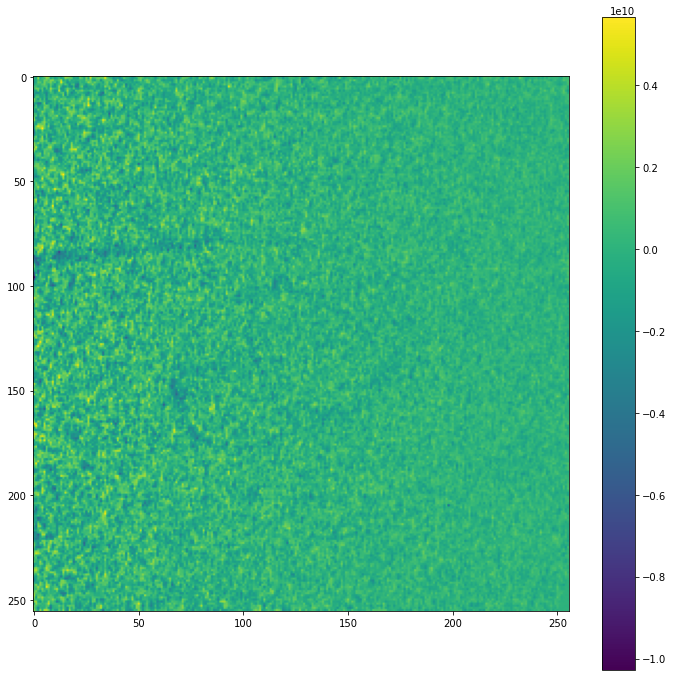

In [8]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(12, 12))
_=ax.imshow(ghost)
fig.colorbar(_)

In [9]:
bin_size


317

From the following, the wire image is reconstucted based on uniform random background distribution.

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.image as mpimg
import matplotlib.patches as patches

from matplotlib.patches import Rectangle

#from PIL import Image

from scipy import ndimage
import copy

In [11]:
bin_size = 1000

img_mp = np.ndarray([bin_size], dtype=np.ndarray)
img_ob = np.ndarray([bin_size], dtype=np.ndarray)
img_sum = np.zeros([bin_size])
img_int = np.zeros([bin_size])

In [12]:
for i in range(bin_size):
    img_mp[i] = np.random.randint(100,110,size=256**2).reshape(256,256)
    img_ob[i] = copy.deepcopy(img_mp[i])

    for r in range(len(pos_union)):
        img_ob[i][pos_union[r][0]][pos_union[r][1]] = 0.0

    img_sum[i] = np.sum(img_ob[i])
    img_int[i] = np.sum(img_mp[i])/256/256
    
bucket_avg = np.mean(img_sum)
int_avg = np.mean(img_int)

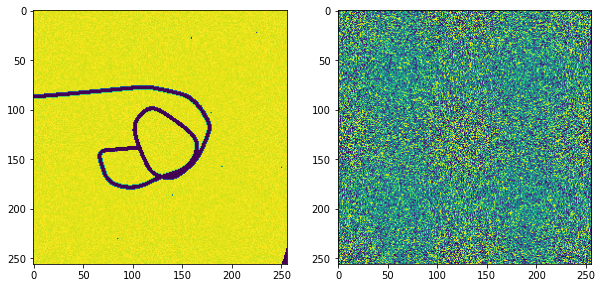

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1, figsize=(10, 5))
_=ax1.imshow(img_ob[0])
_=ax2.imshow(img_mp[0])
#fig.colorbar(_)


In [14]:
ghost = np.zeros([256,256])

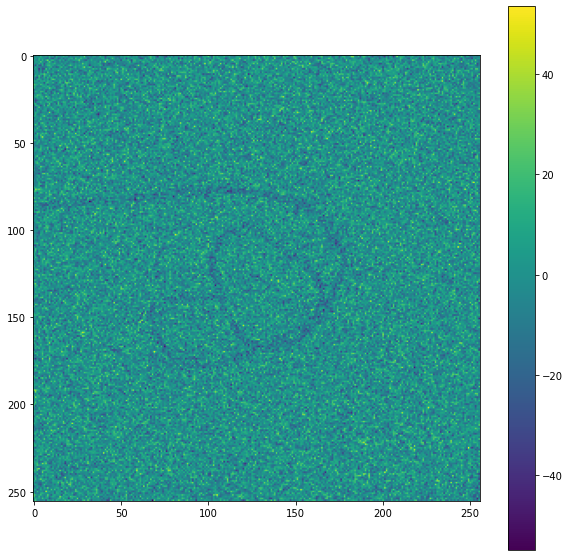

In [15]:
# Differential GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin] - bucket_avg*img_int[bin]/int_avg)*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax.imshow(ghost)
fig.colorbar(_)

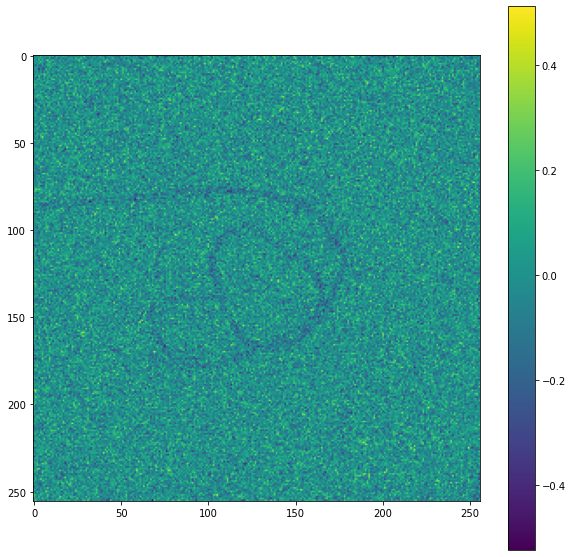

In [16]:
# Normalized GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin]/img_int[bin] - bucket_avg/int_avg)*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10, 10))
_=ax.imshow(ghost)
fig.colorbar(_)
#print(ghost[10,:])